<h1>Graph Network Analysis for Anti-Money Laundering with Python</h1>

<h2>Importing Libraries</h2>

In [2]:
import pandas as pd
import networkx as nx
from pyvis import network as net
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
pd.options.display.float_format = '{:,.0f}'.format

<h2>Importing Libraries</h2>

In [4]:
# https://www.kaggle.com/datasets/anshankul/ibm-amlsim-example-dataset

from zipfile import ZipFile
with ZipFile('data.zip','r') as zip:
    zip.extractall(path='data')

<h2>Check Dataset</h2>

In [5]:
txn_small = pd.read_csv('data/transactions_sample.csv', usecols=['SENDER_ACCOUNT_ID','RECEIVER_ACCOUNT_ID','TX_AMOUNT'], dtype='object')
txn_small['TX_AMOUNT'] = txn_small['TX_AMOUNT'].astype(float)
txn_small

,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT
0,7366,8662,65
1,9245,7121,"1,043"
2,6427,9245,501
3,7515,8255,587
4,7515,8255,587
...,...,...,...
1845,6427,9245,501
1846,7515,8255,587
1847,7515,8255,587
1848,6427,9245,501


<h1>Obtaining Transaction Summary for Each Node Pair</h1>

In [6]:
edge_small = txn_small.groupby(['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID'],as_index=False).agg({'TX_AMOUNT':['count','sum']})
edge_small.columns = ['source','target','agg_txn_count','agg_txn_amt']
edge_small

,source,target,agg_txn_count,agg_txn_amt
0,6427,8264,1,4
1,6427,9245,177,"88,751"
2,7366,1332,2,"2,357,413"
3,7366,5463,2,"1,527,734"
4,7366,5717,2,"344,658"
...,...,...,...,...
103,9628,9917,20,"2,230"
104,9628,9961,20,"2,230"
105,9628,9973,20,"2,230"
106,9628,9974,20,"2,230"


<h1>Importing Transactions to Networkx</h1>

In [7]:
G = nx.from_pandas_edgelist(edge_small, source='source', target='target')

In [8]:
# Show the first 5 node of G
list(G.nodes)[0:5]

['6427', '8264', '9245', '7366', '1332']

In [9]:
# Show the first 5 edge of G
list(G.edges)[0:5]

[('6427', '8264'),
 ('6427', '9245'),
 ('9245', '9056'),
 ('9245', '1651'),
 ('9245', '2483')]

In [10]:
# Show the first 5 node of G with all attributes
list(G.nodes(data=True))[0:5]

[('6427', {}), ('8264', {}), ('9245', {}), ('7366', {}), ('1332', {})]

In [11]:
# Show the first 5 edge of G with all attributes
list(G.edges(data=True))[0:5]

[('6427', '8264', {}),
 ('6427', '9245', {}),
 ('9245', '9056', {}),
 ('9245', '1651', {}),
 ('9245', '2483', {})]

<h1>Various network layout</h1>

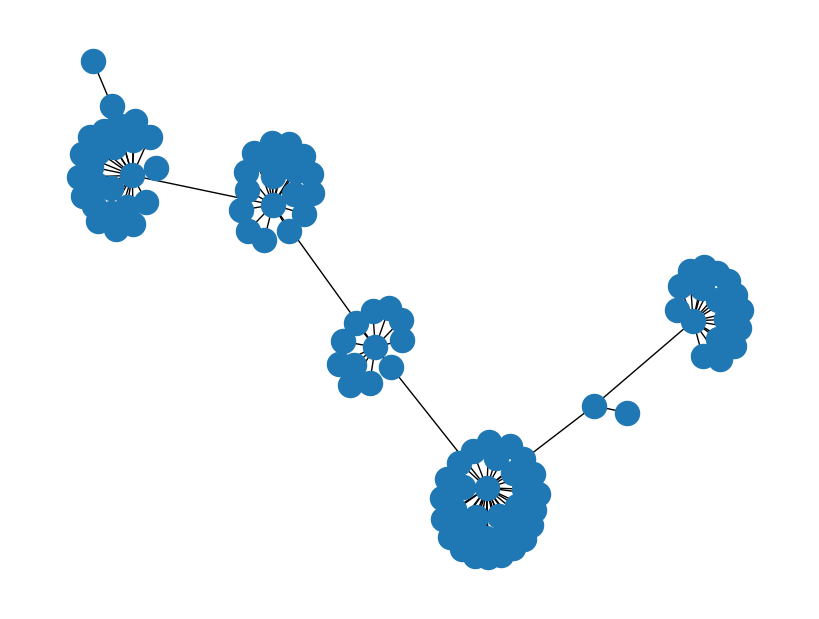

In [12]:
# Networkx Default Layout
plt.figure(figsize=(8,6))
nx.draw(G)
plt.show()